In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Reading Data

In [2]:
spam=pd.read_csv('spam.csv')

In [3]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
spam=spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam.shape

(5572, 2)

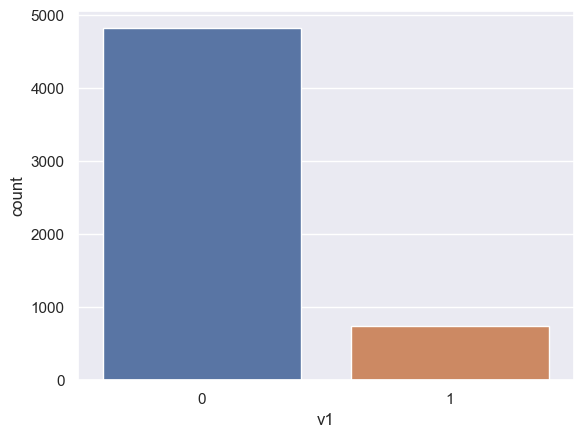

In [37]:

sns.countplot(x = 'v1',
              data = spam,
              order = spam['v1'].value_counts().index)
plt.show()

In [40]:
spam['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [41]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int32 
 1   v2      5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


# Manuplating Data

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
spam['v1']=encoder.fit_transform(spam['v1'])

In [43]:
spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [44]:
spam.duplicated().sum()

403

In [45]:
spam=spam.drop_duplicates(keep='first')

In [46]:
spam.duplicated().sum()

0

In [47]:
spam.shape

(5169, 2)

In [48]:
Spam=spam[spam.v1==1]
ham=spam[spam.v1==0]

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

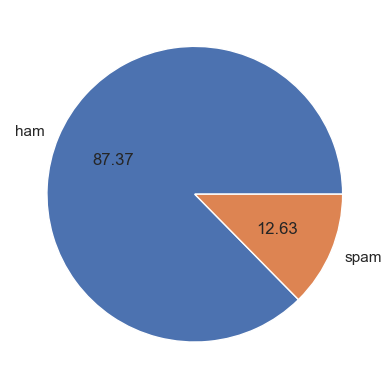

In [50]:
plt.pie(spam['v1'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

# MOdelling dataset

In [51]:
x = spam['v2']
y = spam['v1']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=3)

In [53]:
print(x_train.shape)

(3618,)


In [54]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object


In [55]:
#transform text data to features vectors 
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

In [56]:
print(x_train_feature)

  (0, 5198)	1.0
  (1, 2293)	0.7979335406643508
  (1, 1489)	0.6027454393712596
  (2, 3034)	0.2862466905395788
  (2, 5055)	0.3657764177614156
  (2, 1055)	0.4200639022088221
  (2, 6431)	0.49916831002651785
  (2, 2186)	0.4200639022088221
  (2, 6067)	0.3275695503657719
  (2, 3540)	0.2032199381389515
  (2, 3338)	0.18328645658693968
  (3, 2419)	0.44244521480530424
  (3, 3812)	0.34502269610210995
  (3, 1510)	0.421341792357347
  (3, 2315)	0.44244521480530424
  (3, 2005)	0.40636867584436154
  (3, 5002)	0.2709053305786043
  (3, 3606)	0.2709053305786043
  (4, 1388)	0.5624915337320647
  (4, 6176)	0.6741828217960496
  (4, 1905)	0.47862385782038214
  (5, 1247)	0.45759936315816907
  (5, 4677)	0.47446013267146536
  (5, 4493)	0.47446013267146536
  (5, 2460)	0.47446013267146536
  :	:
  (3615, 2955)	0.13536405586135689
  (3615, 5089)	0.1473268849473292
  (3615, 6244)	0.11191834003764295
  (3616, 5863)	0.6101040846640515
  (3616, 2099)	0.42891741309223935
  (3616, 4823)	0.5549835937601773
  (3616, 3414)	0.

In [57]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64


In [58]:
logistic = LogisticRegression()

In [59]:
logistic.fit(x_train_feature, y_train)

LogisticRegression()

In [60]:
prediction= logistic.predict(x_test_feature)

In [61]:
accuracy_score(y_test, prediction)

0.9484203739522888

In [62]:
precision_score(y_test, prediction)

0.9724137931034482

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test, prediction)

array([[1330,    4],
       [  76,  141]], dtype=int64)

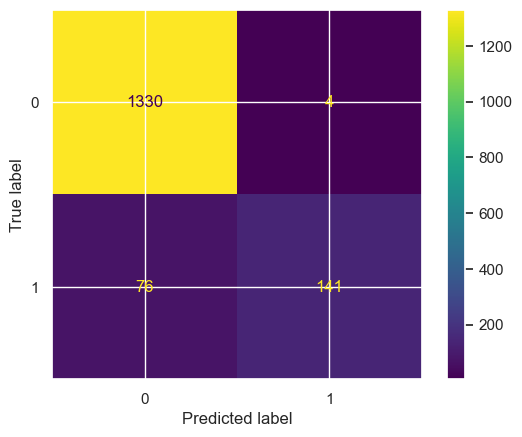

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction, labels=logistic.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic.classes_)
disp.plot()
plt.show()


In [56]:
#f1_score(y_test, prediction)

In [57]:
pre = logistic.predict(x_train_feature)

In [58]:
accuracy_score(y_train, pre)

0.9588170259812051

In [59]:
precision_score(y_train, pre)

1.0

In [60]:
#making prediction
input_text=['SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info']

In [61]:
input_data_feature = feature_extraction.transform(input_text)

In [62]:
predic= logistic.predict(input_data_feature)

In [63]:
  print(predic)

if (predic[0]==1):
    print('spam mail')
else:
    print("ham Mail")

[1]
spam mail
